# Project Flow

# 1. Designing the Overall Strategies
### 1-1. Determine the Project Objectives
- To build an investment model that maximizes the returns of qualterly investment portfolio in healthcare. <br>
- To build an interactive dashboard capturing the model results for portfolio managers.

### 1-2. Research for Brainstorming & Methodology <br>
<details>
  <summary>✚ <b><i>1-2-1. Fundamental Analysis</i></b>  (Click to see details)</summary>
  
The concept of Fundamental Analysis was adopted to rank stocks. Then, portfolio optimazation modeling was conducted with top 25% ranked stocks. <br>

Fundamental Analysis is a method of determining a stock's real or "fair market" value by examining related economic and financial factors. The financial ratios of a firm can infer the financial health (or fair market value) of the organization. If the fair market value (intrinsic value or true value) is higher than the market price, the stock is deemed undervalued, and a buy recommendation is given. On the other hand, if the fair market value is lower than the market price, the stock is deemed overvalued, and the recommendation might be not to buy or to sell if the stock is held. We used 17 financial ratios as the indicators to assess stocks for an investment. They also helped to downsize the number of stocks in healthcare for the portfolio optimization modeling. <br>

Note that 17 ratios are used for modeling. The 17 financial ratios are either imported from an API or calculated with the 10-year financial statement information of publicly traded healthcare firms. Below is the list of the ratios used.
    
> - Valuation Ratios 
> 1. Price to Sales (P/S): The value that financial markets have placed on each dollar of a firm’s sales
> 2. Price to Earning (P/E): Compares current price to EPS (over/under/fair-valued), Average of historical P/Es  VS  Today’s P/E (monthly) 
> 3. Price to Earning Growth (P/EG): P/E / EPS growth
> 4. Price to Book (P/B): Compares a company's current market value to its book value
> 5. Price to Cash Flow (P/CF): Measures how much cash a company generates relative to its stock price (Stock price to cash flow per share) 
> 6. Price to Operating Cash Flows (P/OCF): stock Price/ operating cash flow 
> 7. Price to Free Cash Flows (P/FCF): market capitalization/ free cash flow 
> - Profitability Ratios
> 8. Profit Margin: Amount by which revenue from sales exceeds costs in a business
> 9. Gross Profit Margin: (Revenue-COGS)/ Revenue
> 10. Net Profit Margin: Net income/ revenues 
> 11. Operating Profit Margin: Operating profit/ revenue
> 12. Earnings Per Share (EPS): Profit per share held by common stockholders
> 13. Return On Equity (ROE): Efficiency of the usage of the assets to generate profits
> - Liquidity Ratios
> 14. Debt to Equity (D/E): Measure of how much debt you use to run a business
> 15. Cash: (Cash + cash equivalents)/ current liabilities
> 16. Current: Assets to liabilities
> 17. Quick: Ability to convert current liquid assets to cash quickly to perform debt obligations

</details>
<br>



<details>
  <summary>✚ <b><i>1-2-2. Ranking Financial Ratios</i></b>  (Click to see details)</summary>
    
OLS\*, Equal Weight\*, EBM\*, and XGB\* methods were leveraged to rank the 17 financial ratios. We're interested in recognizing ratios that have the biggest influence in relation to daily stock price change because we’re going to rank stocks to invest on the basis of the financial ratios that have the most signiticant impact on the daily price change in the next modeling stage. The way financial ratios are rated is based on the independent variables ('x's) including 17 financial ratios, trade dates, and yesterday’s stock prices against the dependent variable ('y') which is the percent change in the daily stock prices for 10 years. Moreover, the data was split into a training set and a test set by assigning the first 9 weeks as the training set and the last 3 weeks as the test set in each quarter. Below is the general descriptions of the methodology used for modeling. <br>
    
> -	**OLS (Statistics)** stands for Ordinary Least Squares; it’s a simple linear regression that minimizes the sum of squares in the difference between the observed and expected values.  The key attribute is that the OLS estimators have the least variance among all linear and unbiased estimators, they are the best (most efficient) estimator.
> -	**Equal Weight** means that the 17 different financial ratios are evenly rated with the same weight assuming each ratio is equally important. 
> - **EBM (Machine Learning)** stands for Explainable Boosting Machine. It's another interpretable, glassbox model intended to have comparable accuracy to machine learning models which is main advantage. The key attribute is that the training is performed in multiple iterations, each iteration consists of building a separate boosting process for each feature.
> - **XGBoost (Machine Learning)** stands for Extreme Gradient Boosting; it’s very interpretable and performs very well on structured data. The key attributes are computing second-order gradients and L1 & L2  regularization. In addiction, XGBoost can be parallelized across clusters.  

After ranking the 17 financial ratios, the ranking of each ratio was converted to a weight (a standardized numeric value) per model. For the results of EBM and XGB, the feature importance of each financial ratio was calculated and it’s converted to a weight indicating the extent of the importance of the ratio. The greater value of a weight refers to a more significant ratio in terms of the daily stock price change. The next step is that stocks were ranked based on the weights of the 17 financial ratios. 
    
</details>
<br>



<details>
  <summary>✚ <b><i>1-2-3. Ranking Stocks</i></b>  (Click to see details)</summary>

After the weight per ratio is identified for OLS, EMB, XGB, and Equal Weight, it’s used to obtain the overall rankings of stocks using the Python function ‘rank().’ 

##### Background
Please note that the ratios have different standards for interpreting the values. Higher values are considered desirable for some ratios while lower values are considered desirable for the other ratios. For instance, a lower value is interpreted as better for D/E (Debt to Equity) ratio. Let’s say that stock A has a D/E value of 0.5 and stock B has that of 1.2. Then 0.5 is a more desirable number for D/E ratio. It was taken into considerations when ranking stocks using the ratios.

Financial ratios that the higher values considered better are:
- Price to Sales (P/S)
- Price to Earning (P/E)
- Price/Earnings to Growth (PEG)
- Price to Book (P/B)
- Price to Cash Flow (P/CF)
- Price to Free Cash Flows (P/FCF)
- Debt to Equity (D/E)
- Price to Operating Cash Flows (P/OCF)


Financial ratios that the lower values considered better are:
- Profit Margin
- Gross Profit Margin
- Net Profit Margin
- Operating Profit Margin
- Earnings Per Share (EPS)
- Return On Equity (ROE)
- Cash (Liquidity ratio)
- Current (Liquidity ratio)
- Quick (Liquidity ratio)


<br>


##### How Ranking Works
Each stock's values of 17 financial ratios were input for modeling. Besides, each ratio is ranked by the 4 different models (OLS, EMB, XGB, and equal weight) and the rankings of ratios were converted to a weight. Then, we multiplied the weight of a ratio with the value of ‘ratio ranking/ total stocks number’ to calculate the stock ranking score for that ratio. A stock ranking score is evaluated per ratio and per quarter for the 4 methods. As a result, each model has stocks ranked on a quarterly basis.

ex)
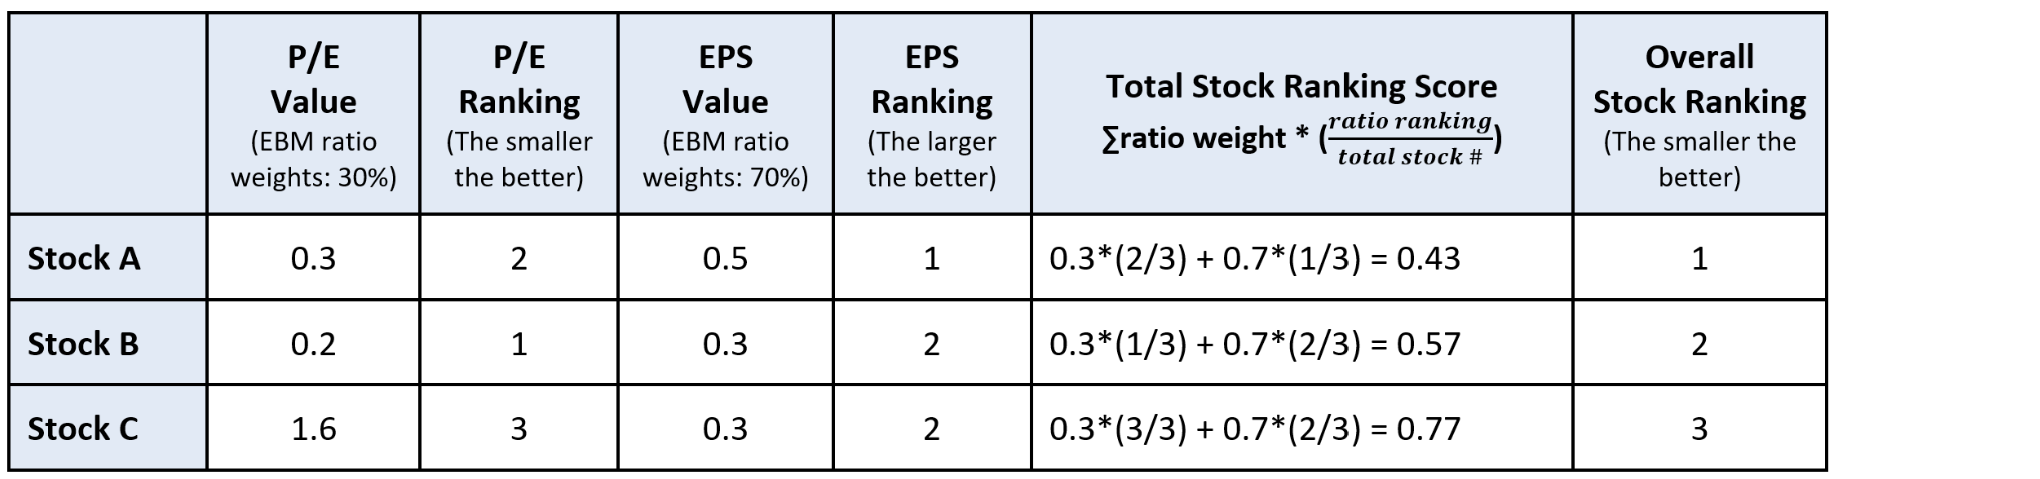

In addition, we assumed that the latest stock data reflects more information. So we gave the 50% weight to the performance from the most recent quarter and the remaining 50% weight to the performance from the past quarters. For example, in order to get the stock ranking for 2022Q1, we gave 50% weights on the stock ranking of 2021Q4 and 50% weights on the stock rankings from 2012Q2 to 2021Q3. 


After the rankings of stocks were finalized, the top 25% of stocks were populated for the next step which was portfolio optimization. <br>

</details>
<br>



<details>
  <summary>✚ <b><i>1-2-4. Portfolio Optimization</i></b>  (Click to see details)</summary>
    
After the overall stock rankings were calculated, the top 25% percentile stocks per quarter was elected to be included in the quarterly stock pool to build a portfolio. Optimization is a mathematical technique for finding a maximum or minimum value of a function of several variables subject to a set of constraints, as linear programming or systems analysis. The optimal portfolio was built by setting the objective to maximize Sharpe Ratio*. The decision variables are the weights of each stock. There are 2 constraints which are the sum of the stock weights in a quarterly portfolio is equal to 1 but each stock's weight in the portfolio should not be smaller than 0. After all, the optimal solution is generated by the model that incldues the combination of the stocks and thier proportions in the portfolio that maximizes Sharpe Ratio for the corresponding quarter. The combination of the stocks becomes the ultimate investment portfolio of the model. 
    
> - Sharpe Ratio: The average return earned in excess of the risk-free rate per unit of volatility or total risk.  
> 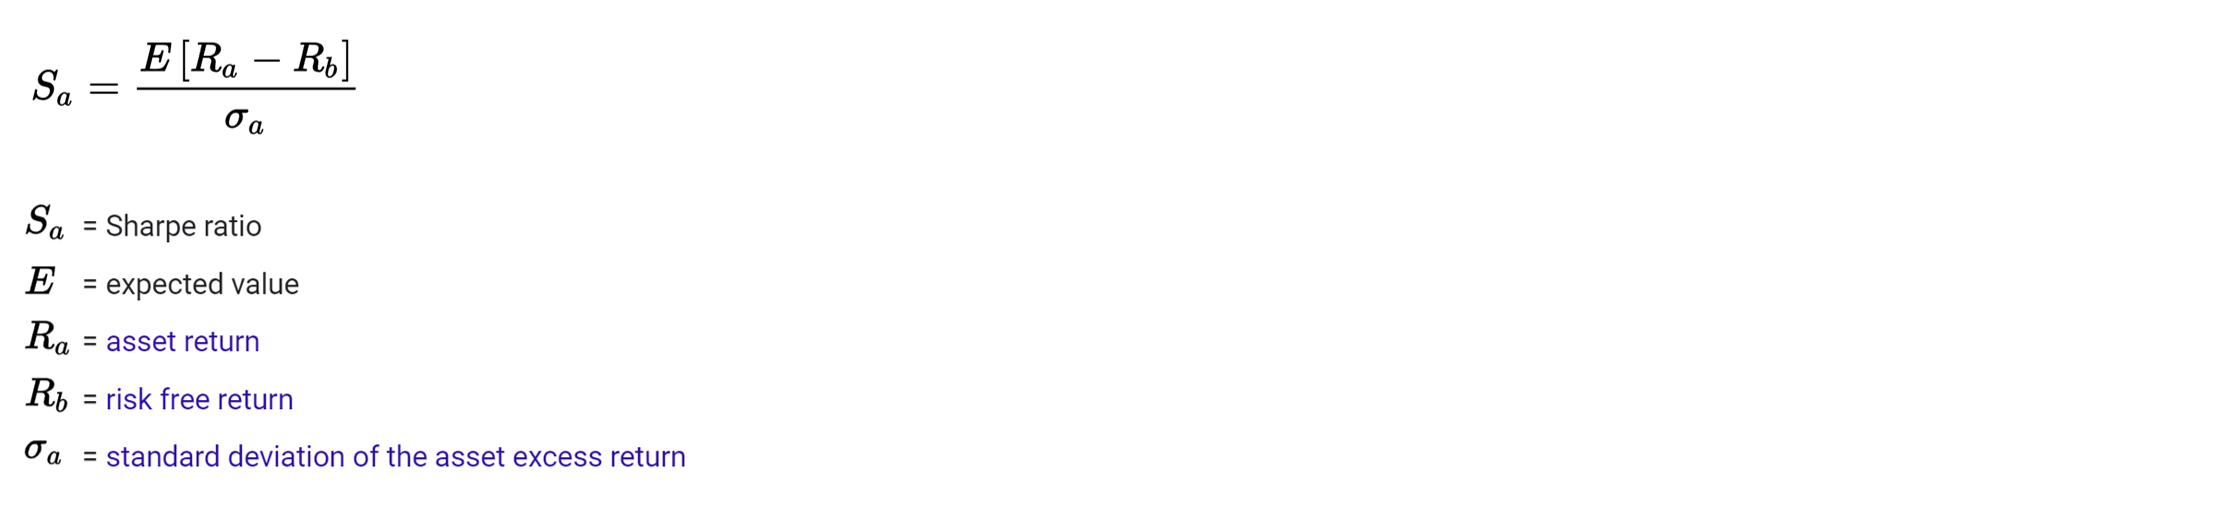
    
</details>
<br>



<details>
  <summary>✚ <b><i>1-2-5. Backtesting (Performance Evaluation)</i></b>  (Click to see details)</summary>
    
Backtesting is a process of testing whether the portfolio from the different models using past data has good performance in the future data. For instance, quarterly historical stock information is used in order to get the portfolio performance of the most recent quarter. If a user wants the portfolio performance for 2021Q1, the data prior to 2022Q1 is used to calculate the optimal investment portfolio. The invested amount is simply the total portfolio value of the last date of the previous quarter. (2021Q4 in this case.) Then the results of the performance is compared with the real stock data of 2021Q1. 
    
The results of the optimized models for OLS, XGB, EBM, and Equal Weight is realized in the backtesting stage and each model’s portfolio return rates are calculated on a daily/ monthly/ quarterly/ yearly basis for 10 years from 2012Q3 to 2022Q1. 
    
Moreover, We built portfolios based on the top 5%, 10%, 15%, 20%, 25%, and 30% percentile of the stocks. We decided to elect the 25% percentile as the size of the stock pool for modeling since the 25% percentile not only performed good in return rates but also did not contain too many stocks in the stock pool. The best method for building a portfolio based on 25% percentile was linear regression.  
    
</details>
<br>


# 2. Data Collection

### 2-1. Preparation for Data Sourcing

##### 2-1-1. Identifying the full list of publicly traded healthcare companies in the US --> The list is downloaded from the NASDAQ website
- More than 3000 healthcare companies registered: Scaled down to 425 by excluding penny stocks (closing stock price below $5) & certain subsectors

##### 2-1-2. Selecting the API provider for sourcing stock information (daily) and financial statements (quarterly)

### 2-2. Data Sourcing & Data Cleaning <a href="about.html">[View code]<a>

<br>
<br>


# 3. Modeling (Python)

### 3-1. Ranking Financial Ratios
- OLS (Statistics) <a href="about.html">[View code]<a>
- EBM (Machine Learning) <a href="about.html">[View code]<a>
- XGB (Machine Learning) <a href="about.html">[View code]<a>
- Equal weight <a href="about.html">[View code]<a>


### 3-2. Ranking Stocks <a href="about.html">[View code]<a>
- OLS (Statistics)
- EBM (Machine Learning)
- XGB (Machine Learning)
- Equal weight

<br>

# 4. Portfolio Optimization & Backgtesting (Python) 

### 4-1. Portfolio Optimization <a href="about.html">[View code]<a>
##### 4-1-1. Modeling 
- OLS (Statistics)
- EBM (Machine Learning)
- XGB (Machine Learning)
- Equal weight

##### 4-1-2. Model Comparison & Selection 
    
### 4-2. Backgtesting 


<br>


# 5. Dashboarding (Tableau)

Features included <a href="https://github.com/jihye-jenny-choi/Project_Portfolio/blob/main/Investment%20Portfolio/Introduction%20to%20Dashboard%20Design%20of%20the%20Investment%20Model.ipynb">[View visualizations]<a>
     
- Portfolio performance
- Breakdown of investment returns
- Stock allocation in the quarterly portfolio
- Search for historical stock information 
